<a href="https://colab.research.google.com/github/afrojaakter/Pattern-Recognition/blob/main/PCAandSVD_OvarianCancerData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

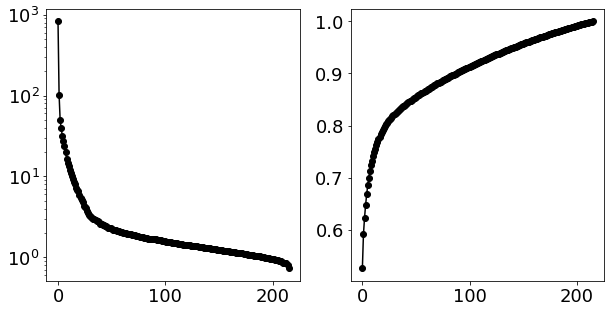

In [79]:
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 18})

obs = np.loadtxt(os.path.join('/content/drive/MyDrive/Data/databook_python/DATA/ovariancancer_obs.csv'),delimiter=',')

f = open(os.path.join('/content/drive/MyDrive/Data/databook_python/DATA/ovariancancer_obs.csv'), "r")
grp = f.read().split("\n")
# SVD
U, S, VT = np.linalg.svd(obs,full_matrices=0)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-o',color='k')
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')
plt.show()

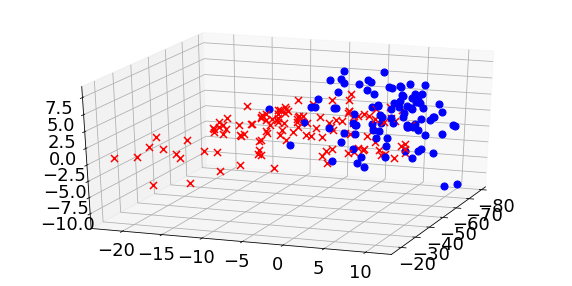

In [80]:
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
l = 121
for j in range(l):
    x = VT[0,:] @ obs[j,:].T
    y = VT[1,:] @ obs[j,:].T
    z = VT[2,:] @ obs[j,:].T
    ax.scatter(x,y,z,marker='x',color='r',s=50)
    
for j in range(l, obs.shape[0]):
  x = VT[0,:] @ obs[j,:].T
  y = VT[1,:] @ obs[j,:].T
  z = VT[2,:] @ obs[j,:].T
  ax.scatter(x,y,z,marker='o',color='b',s=50)  

ax.view_init(25,20)
plt.show()

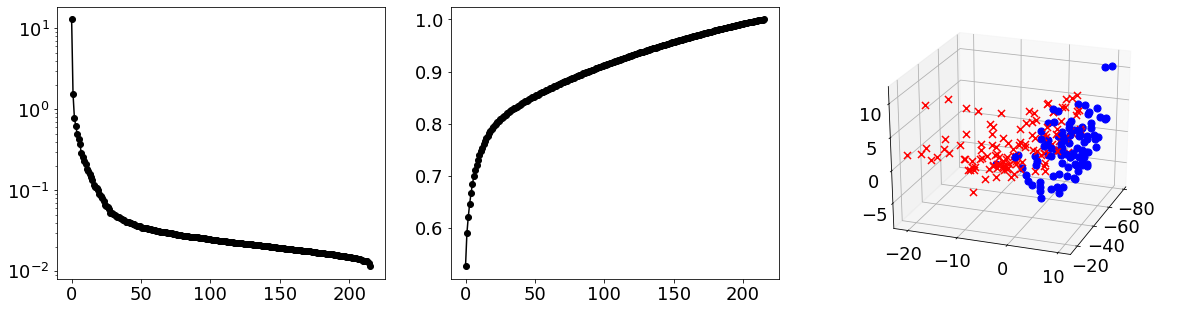

In [78]:
#Using PCA
P = obs - np.tile(np.mean(obs),(4000,1)).T 
U, S, VT = np.linalg.svd(P/np.sqrt(4000),full_matrices=0)


plt.rcParams['figure.figsize'] = [20, 5]

fig1 = plt.figure()
ax1 = fig1.add_subplot(131)
ax1.semilogy(S,'-o',color='k')
ax2 = fig1.add_subplot(132)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')


ax3 = fig1.add_subplot(133, projection='3d')
l = 121
for j in range(l):
    x = VT[0,:] @ obs[j,:].T
    y = VT[1,:] @ obs[j,:].T
    z = VT[2,:] @ obs[j,:].T
    ax3.scatter(x,y,z,marker='x',color='r',s=50)
    
for j in range(l, obs.shape[0]):
  x = VT[0,:] @ obs[j,:].T
  y = VT[1,:] @ obs[j,:].T
  z = VT[2,:] @ obs[j,:].T
  ax3.scatter(x,y,z,marker='o',color='b',s=50)  

ax3.view_init(25,20)
plt.show()